# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

Just like last time, the structure for the notebook was already set up, and I just needed to add my own stuff: Code and documentation along the way. The text segment above was already here, for example.

Today's target learning:
1. Combine notebook with HTML markup
2. Python list slicing on Pandas Dataframes and .agg() aggregate function
3. Create scatter plots, bar charts, line charts with two axes
4. Understand database schema with primary and foreign keys, merge dataframes with common key

The data folder contains the contents (.csv) for today's tasks

Apparently the first task is to create a text box with HTML markup so the following text will have that:

<img src="https://i.imgur.com/49FNOHj.jpg">
or we can use assets/bricks.png

Another thing to know is the heading tag, we can use h1,h2.. but notebooks have their own shorthand: using # at the start of a line will make it large. Here's some text with increasing number of # in front of them:

# This is the largest one

## A bit smaller

### The third heading

#### The fourth

and so on...

# Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [6]:
colors_df = pd.read_csv('data/colors.csv')
#colors_df.nunique(axis=1, dropna=True)
colors_df.name.nunique()

135

In [7]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


Using dropna as true or false didn't change a thing.

I didn't know how to count unique values in a specific column so I had to look at StackOverflow

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [10]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


The first obvious contender I thought of was to group by values since we either have f or t. That would give me an accurate count

In [14]:
print("f:",int(colors_df[colors_df.is_trans == 'f'].count().id))
print("t:",int(colors_df[colors_df.is_trans == 't'].count().id))

f: 107
t: 28


I looked at this in StackOverflow and found that df[condn].count() could be used for this, where condn has to be df.['key'] or df.key with a conditional operator.

Then I felt like eliminating the redundant values brought in for each column by only taking id column later. Since that was in the np.int64 type, I had to cast it into python int.

In [15]:
colors_df.is_trans.value_counts()

,count
is_trans,
f,107
t,28


Apparently I was expected to find this function, well now I have three methods to find the count so it's a win I guess.

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

Let's do the above challenge here:

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png" />

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png" />


The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [16]:
sets_df = pd.read_csv('data/sets.csv')

In [17]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [18]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [19]:
sets_df.sort_values(by='year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [32]:
sets_df[sets_df.year==sets_df.year.min()].count()

,0
set_num,5
name,5
year,5
theme_id,5
num_parts,5


The course solution included a hardcoded value for the initial year. Plus it aimed to display all sets in that year, rather than the count, but it finally introduced the concept of filtering.

In [35]:
sets_df[sets_df.year == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [33]:
sets_df.sort_values(by='num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [40]:
sets_by_year = sets_df[['year', 'set_num']].groupby('year').count()
sets_by_year.head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [41]:
sets_by_year.tail()

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

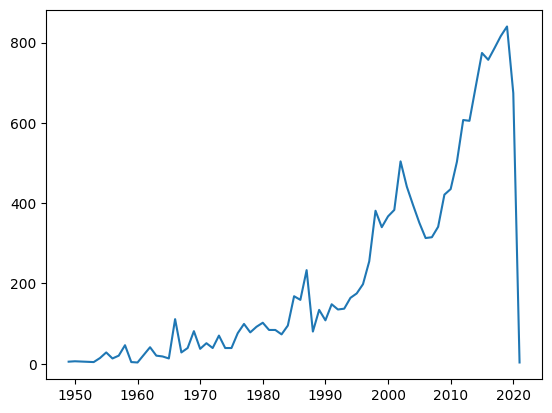

In [51]:
plt.plot(sets_by_year)

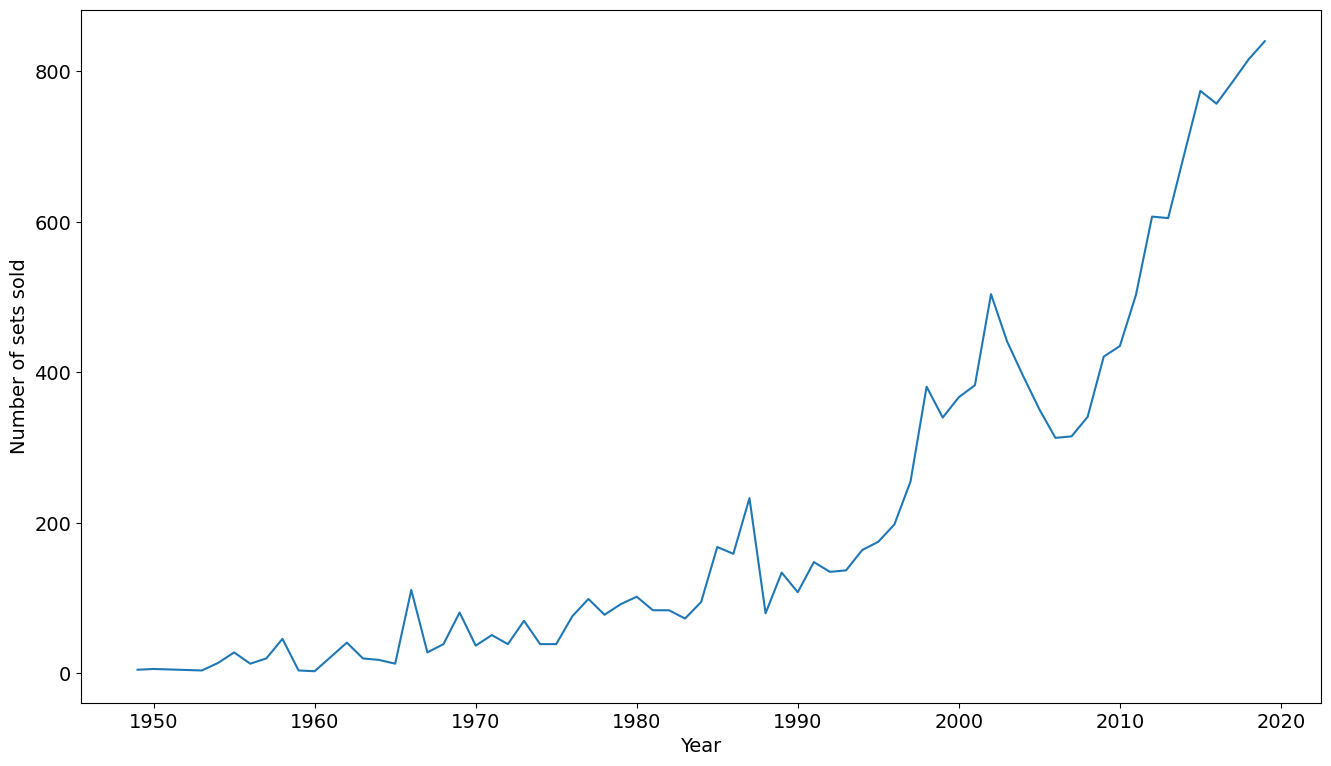

In [53]:
plt.figure(figsize=(16,9))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of sets sold', fontsize = 14)
plt.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2])

Something to remember: the df.index part of the plot is implicit, when we give a df to it with an index and a value scalar, it will auto understand what to plot. We need to give both x and y axis when there's more than 1 columns, the id(index) doesn't count as a column. In this case, the year is an index

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

Since this is more than just the work of a simple groupby, we will need to use the aggregation function to apply operations to columns, we need to provide the operations inside a dict

In [55]:
themes_by_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})

We can also rename the column called 'theme_id' to something that makes more sense with:

In [60]:
themes_by_year.rename(columns={'theme_id':'num_themes'}, inplace= True)
themes_by_year.head()

,num_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [61]:
themes_by_year.tail()

,num_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

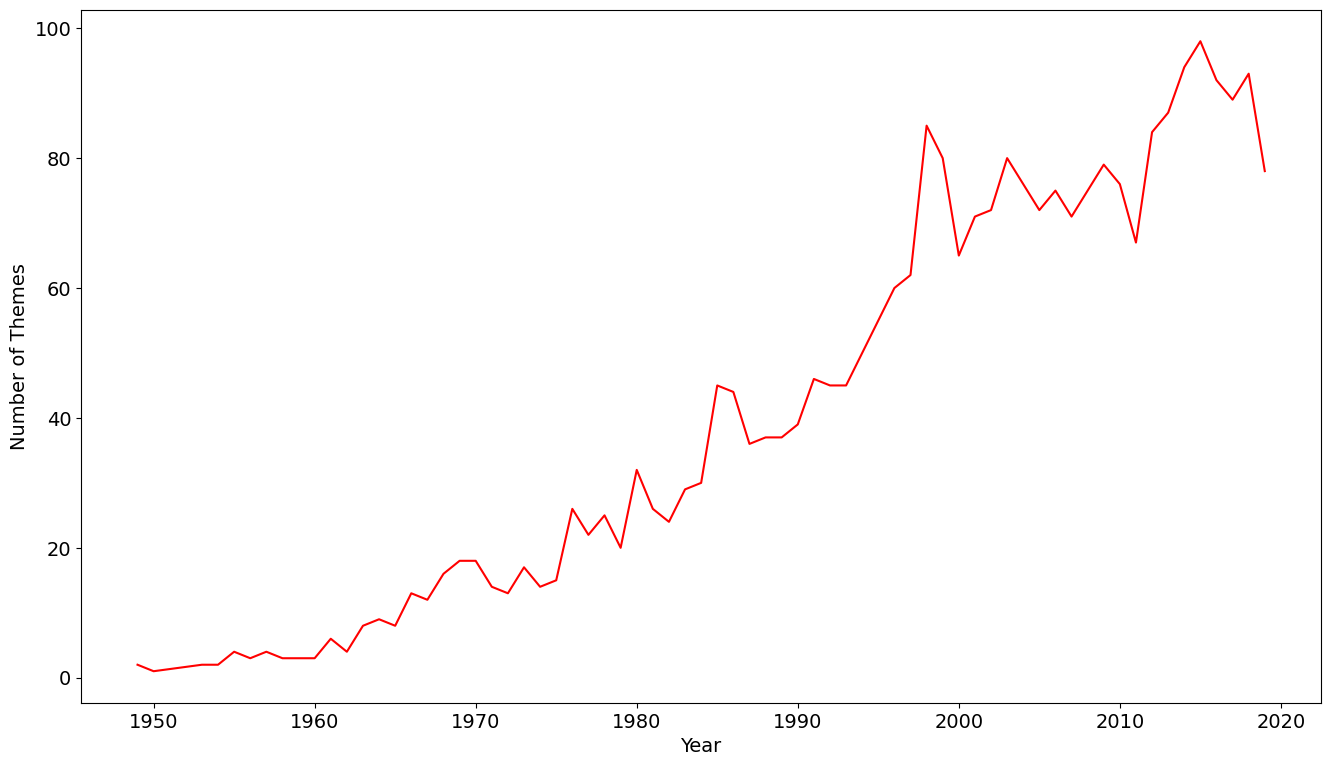

In [69]:
plt.figure(figsize=(16,9))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Themes', fontsize = 14)
plt.plot(themes_by_year[:-2], 'r')

### Line Charts with Two Seperate Axes

We could do what we did in the past and use two separate plots normally to plot the number of sets sold per year and number of themes per year:

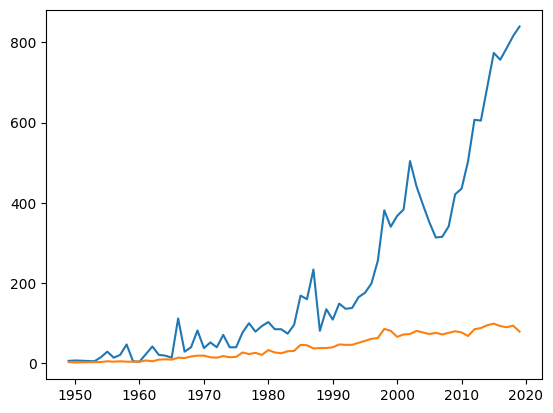

In [71]:
plt.plot(sets_by_year[:-2])
plt.plot(themes_by_year[:-2])

Well obviously the code was a bit more complicated in the solution, with the index being used as the x axis and year/theme count in the y axis, but this feels easier and a better use of available features.

Anyway the scale here feels off, since there's 800+ sets sold per year but less than 100 themes per year, so we need to make sure we can plot them well with the same x axis like:

Text(0, 0.5, 'Themes')

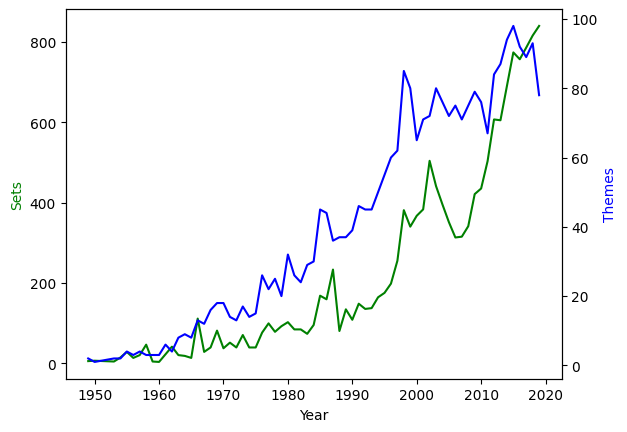

In [81]:
ax1 = plt.gca()
ax2 = plt.twinx(ax1)

ax1.plot(sets_by_year[:-2], 'g')
ax2.plot(themes_by_year[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Sets', color='green')
ax2.set_ylabel('Themes', color='blue')

We use the plt.gca() to get an axis object, then we use twinx() to create an axis object that shares the same X-axis. We then plot on both axes, and use colors to separate them apart. We also set labels using a bit different methods this time, and give them colors as well.

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [85]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [86]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


Easy enough, took a few seconds to look for mean when I realized there was no attribute called pd.Series.average

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

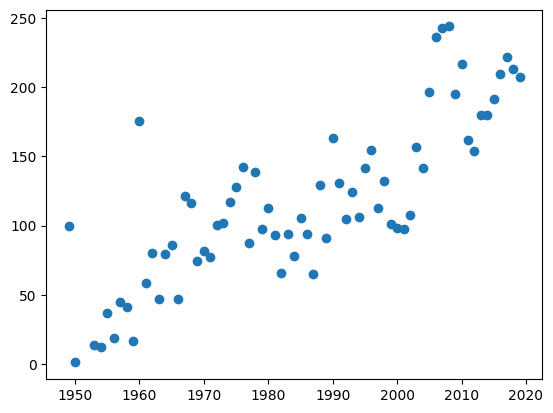

In [89]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

This time there was no option but to supply both the x and y parts, else it wouldn't work and throw an error instead.

The course solution was much the same, with remarks that this plot shows an upward trend

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [90]:
set_theme_count = sets_df.theme_id.value_counts()
set_theme_count

,count
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
512,1
370,1
34,1


From this we know that theme id 158 has 753 total sets, but we don't know what theme id 158 is. We only have names of sets but not the name of themes. For that we will need to reference a database

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='https://i.imgur.com/Sg4lcjx.png'>

 ### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [91]:
themes_df = pd.read_csv('data/themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In a relational database, the data is split into multiple files connected to each other by keys. A foreign key is something that is derived from another table. The foreign key is a primary key and/or unique in some other database/table.

We can see there are ids which link to the theme_ids column in sets.csv
For the challenge we will need to look at the themes.csv file to find the id matches.

In [96]:
themes_df[themes_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


Now that we have all the ids, maybe we can loop through these ids and find them that way?

I was thinking of a more general solution, but apparently the course wants to focus on looking at the data right now using hardcoded values so that's what we will do for now.

In [98]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [100]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key

We have data on theme id and sets per theme in different dataframes, but we can merge them together using .merge()

In [101]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                                'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


We did this because the .merge() function only works when two dataframes have a common column

In [103]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


Now we have both the id-name combo along with the set_count all within the same dataframe.

Now finally we'll utilize the bar() method to plot a bar graph.

<BarContainer object of 10 artists>

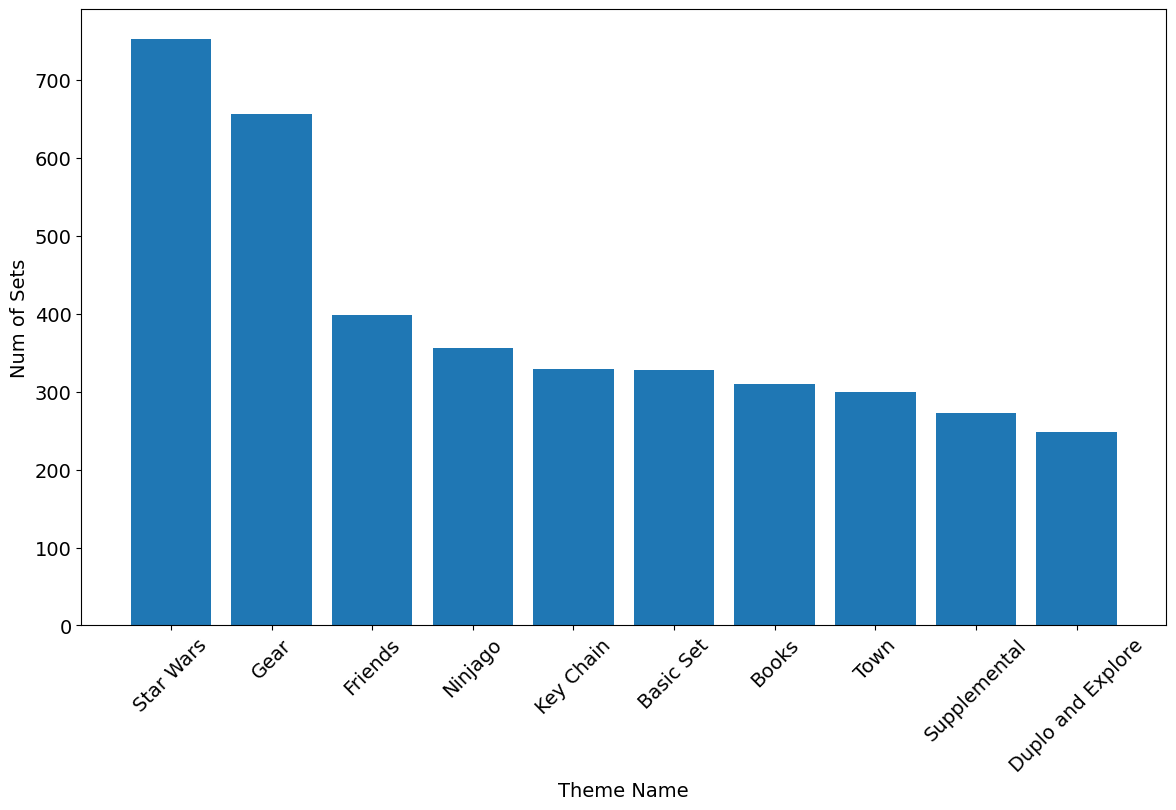

In [104]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Num of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

Okay this was it, learned a ton today as well.